In [4]:
from pylab import *
from numba import njit
from scipy.optimize import *
from scipy.integrate import *

### Ecuaciones diferenciales para el mini sistema solar

In [5]:
def sist_sol(t,x_v,ms=[0,0]):
    # x_v = xt,yt,vxt,vyt,xp,yp,vxp,vyp
    #       0, 1,  2,  3, 4, 5,  6, 7
    dx_v = np.zeros(len(x_v))
    rt , rp = sqrt( x_v[0]**2 + x_v[1]**2 ) , sqrt( x_v[4]**2 + x_v[5]**2 )
    rpt = sqrt( (x_v[0]-x_v[4])**2 + (x_v[1]-x_v[5])**2 )
    # Tierra
    dx_v[0] , dx_v[1] = x_v[2] , x_v[3]
    dx_v[2] = -x_v[0]/(rt**3) - ms[1]*(x_v[0]-x_v[4])/(rpt**3)
    dx_v[3] = -x_v[1]/(rt**3) - ms[1]*(x_v[1]-x_v[5])/(rpt**3)
    # Planeta
    dx_v[4] , dx_v[5] = x_v[6] , x_v[7]
    dx_v[6] = -x_v[4]/(rp**3) + ms[0]*(x_v[0]-x_v[4])/(rpt**3)
    dx_v[7] = -x_v[5]/(rp**3) + ms[0]*(x_v[1]-x_v[5])/(rpt**3)
    return dx_v

In [7]:
ti_tf = (0,10*pi)
ci = array([1,0,0,1,0.88,0,0,1])
mov_planetario = solve_ivp(sist_sol,ti_tf,ci,args=([0.001,0.001],),
                rtol=1e-8, atol=1e-8,dense_output=True)

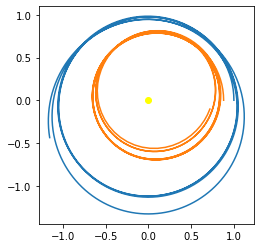

In [8]:
t = linspace(ti_tf[0],ti_tf[1],500)
plot(mov_planetario.sol(t)[0],mov_planetario.sol(t)[1],label="Tierra")
plot(mov_planetario.sol(t)[4],mov_planetario.sol(t)[5],label="Planetoide")

plot([0],[0],'o',color='yellow')
gca().set_aspect('equal')
show()

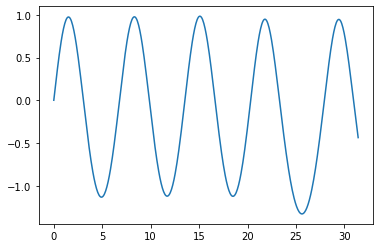

In [11]:
plot(t,mov_planetario.sol(t)[1])

In [16]:
def mapeo(func,t_span,ind,N):
    # N es el numero de raices a obtener
    filtro , j = np.zeros(N) , 0
    t = linspace(t_span[0],t_span[1],10*N)
    for i in range(len(t)-1):
        if func.sol(t[i])[ind]*func.sol(t[i+1])[ind] < 0 and j < N:
            filtro[j] = func.sol(t[i])[ind]
            j += 1
    return filtro

In [17]:
mapeo(mov_planetario,ti_tf,1,9)

array([ 2.20857429e-01, -7.19393312e-02,  3.15842514e-01, -1.16061119e-01,
        4.85871533e-02, -1.99861467e-01,  2.10779478e-05, -4.01227854e-02,
        2.09253583e-01])